# ML-QuIC Demonstration Notebook

This notebook runs through the process for training and testing the models evaluated in the AI-QuIC study.

## Universal Import of Data and Packages

In [11]:
### Import Packages
import importlib as imp
import ML_QuIC as ML_QuIC
imp.reload(ML_QuIC)
import copy
import numpy as np
import tensorflow as tf

In [12]:
### Import Data and Create Objects to Analyze
DATA_DIR = './Data/AlphaSyn'
RANDOM_SEED = 7

# Load dataAC
ml_quic = ML_QuIC.ML_QuIC()
ml_quic.import_dataset(data_dir=DATA_DIR)
ml_quic.get_dataset_statistics()

Loading Data from ./Data/AlphaSyn
---- Dataset Label Distribution ----
Negative Samples: 52
False Positive Samples: 2
Positive Samples: 24

---- Well Content Distribution: ----
Data Wells: 60
Control Wells: 18


[52, 2, 24, 18, 60]

## Unsupervised
### KMeans

In [13]:
### Add 2 KMeans Models
from Models import KMeansModel
ml_quic.add_model(KMeansModel.KMeansModel(n_clusters = 3,
                                          file_path= './SavedModels/Raw/', model_name='kmeans'
                                          ), model_name='KMeans Raw', data_type='raw', tag='Unsupervised')


KMeans Model Loaded:
<class 'sklearn.cluster._kmeans.KMeans'>


### Spectral Clustering

In [14]:
### Add Spectral Clustering
from Models import SpectralClustering
ml_quic.add_model(SpectralClustering.SpectralClustering(n_clusters = 3), model_name='Spectral Raw', data_type='raw', tag='Unsupervised')

## Supervised Models

### SVM

In [15]:
### SVM
from Models import SVM
ml_quic.add_model(SVM.SVM(
    file_path='./SavedModels/Raw/', model_name='svm'
    ), model_name = 'SVM Raw', data_type = 'raw', tag = 'Supervised')


SVM Model Loaded:
<class 'sklearn.svm._classes.SVC'>


### MLP

In [16]:
### MLP
from Models import MLP
ml_quic.add_model(MLP.MLP(NDIM = ml_quic.get_num_timesteps_raw(), 
                          file_path='./SavedModels/Raw/', model_name='mlp'
                          ), model_name = 'MLP Raw', data_type = 'raw', tag='Supervised')

\MLP Model Loaded:
<class 'keras.engine.functional.Functional'>


## Training and Evaluation

### Training

In [17]:
### Train Unsupervised Models
ml_quic.separate_train_test(tags=['Unsupervised'], train_type=3)
ml_quic.train_models(tags=['Unsupervised'])

### Train Supervised Models
ml_quic.separate_train_test(tags=['Supervised'], train_type=0)
ml_quic.train_models(tags = ['Supervised'])

### Unsupervised Evaluation

KMeans Raw:
              precision    recall  f1-score   support

         neg       0.43      0.06      0.10        54
         pos       0.28      0.83      0.42        24

    accuracy                           0.29        78
   macro avg       0.36      0.44      0.26        78
weighted avg       0.38      0.29      0.20        78

Spectral Raw:
              precision    recall  f1-score   support

         neg       0.96      0.50      0.66        54
         pos       0.46      0.96      0.62        24

    accuracy                           0.64        78
   macro avg       0.71      0.73      0.64        78
weighted avg       0.81      0.64      0.65        78



KeyError: 'KMeans Raw'

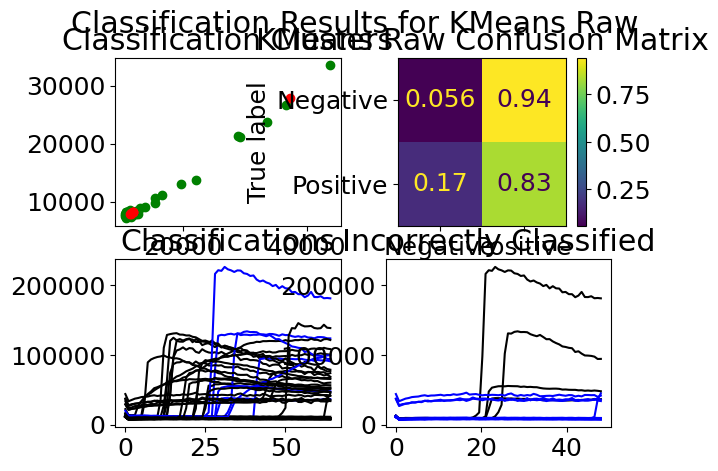

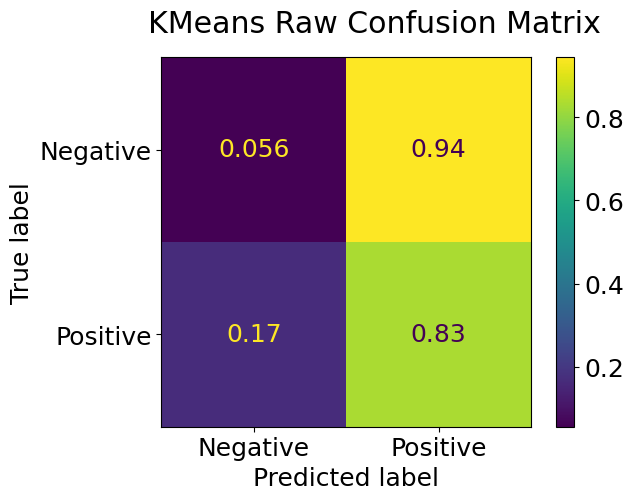

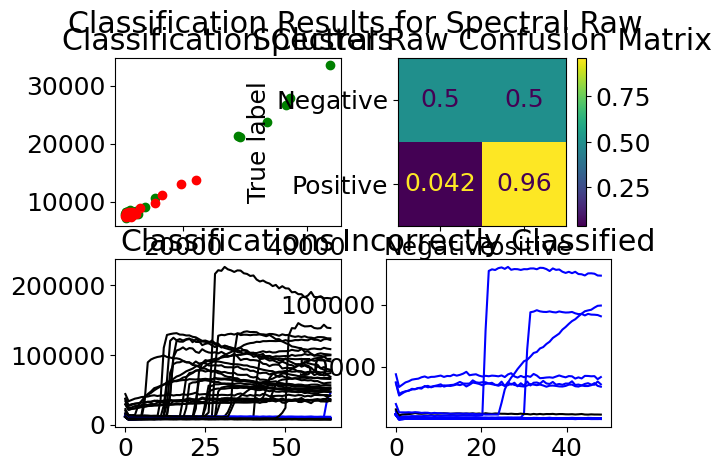

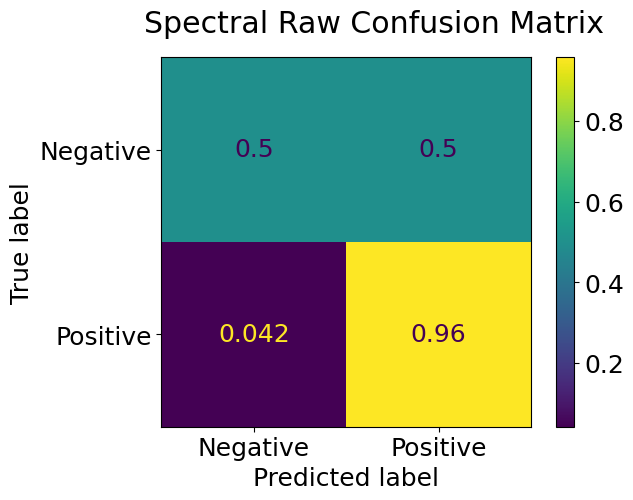

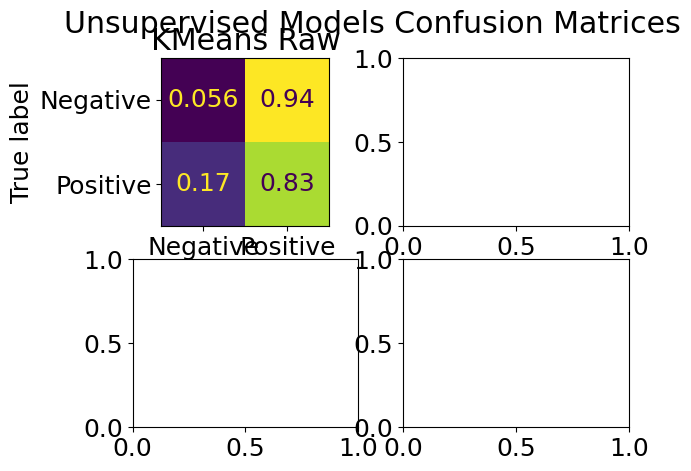

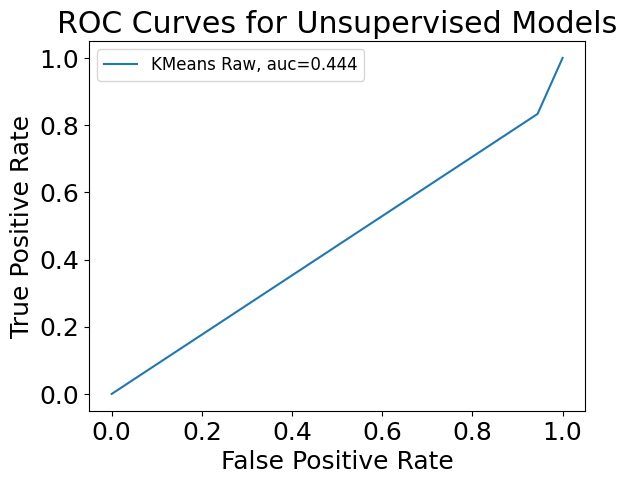

In [18]:
### Get Plots and Scores
ml_quic.get_model_scores(tags=['Unsupervised'])
# ml_quic.evaluate_fp_performance(tags=['Unsupervised'])
ml_quic.get_model_plots(tags=['Unsupervised'])

### Supervised Evaluation

SVM Raw:
              precision    recall  f1-score   support

         neg       0.98      0.99      0.99       704
         pos       0.90      0.89      0.89        98

    accuracy                           0.97       802
   macro avg       0.94      0.94      0.94       802
weighted avg       0.97      0.97      0.97       802

SVM Metrics:
              precision    recall  f1-score   support

         neg       0.99      0.98      0.98       704
         pos       0.84      0.92      0.88        98

    accuracy                           0.97       802
   macro avg       0.91      0.95      0.93       802
weighted avg       0.97      0.97      0.97       802

26/26 [==============================] - 0s 1ms/step
MLP Raw:
              precision    recall  f1-score   support

         neg       0.99      0.98      0.99       704
         pos       0.88      0.95      0.91        98

    accuracy                           0.98       802
   macro avg       0.94      0.97      0.95 

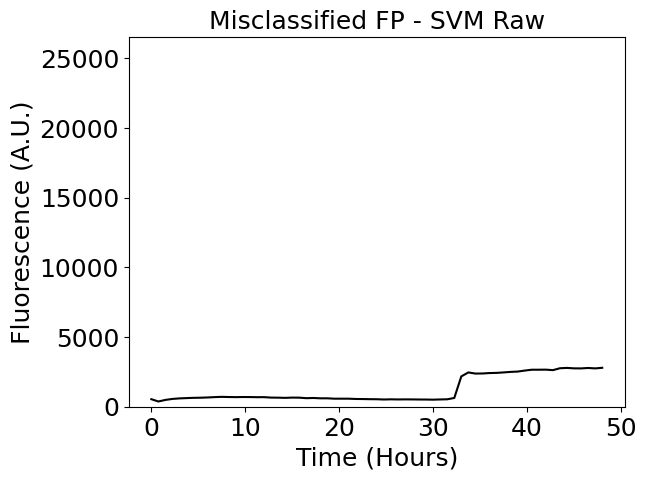

-------- Results on False Positives for SVM Metrics --------
Accuracy on False Positives: 0.43333333333333335
False Positives Account for 68.00% of total misclassifications.
Misclassified FP Characteristics:
Average Time to Threshold: 34.3235294117647
Average RAF: 0.03491307135294118
Average MPR: 7.57519253717647
Average MS: 587.8823529411765
Correctly Classified FP Characteristics:
Average Time to Threshold: 38.94230769230769
Average RAF: 0.03981687846153846
Average MPR: 6.904284285076925
Average MS: 578.7307692307693


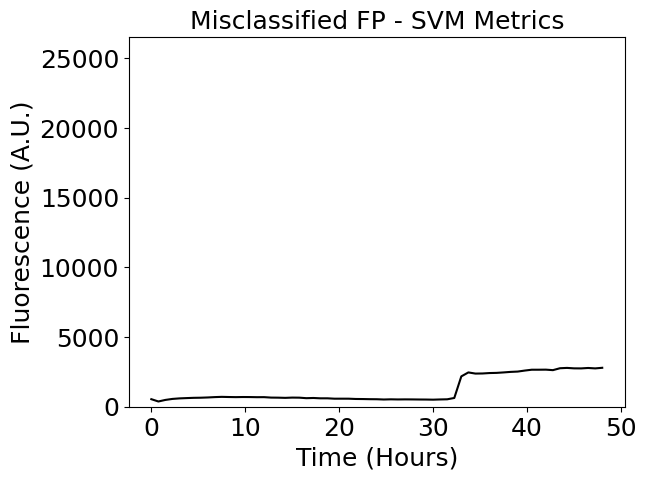

-------- Results on False Positives for MLP Raw --------
26/26 [==============================] - 0s 1ms/step
Accuracy on False Positives: 0.5666666666666667
False Positives Account for 72.22% of total misclassifications.
Misclassified FP Characteristics:
Average Time to Threshold: 32.42307692307692
Average RAF: 0.03648215976923077
Average MPR: 6.909478028692307
Average MS: 574.7692307692307
Correctly Classified FP Characteristics:
Average Time to Threshold: 39.30882352941177
Average RAF: 0.03746315035294118
Average MPR: 7.571220850882353
Average MS: 590.9117647058823


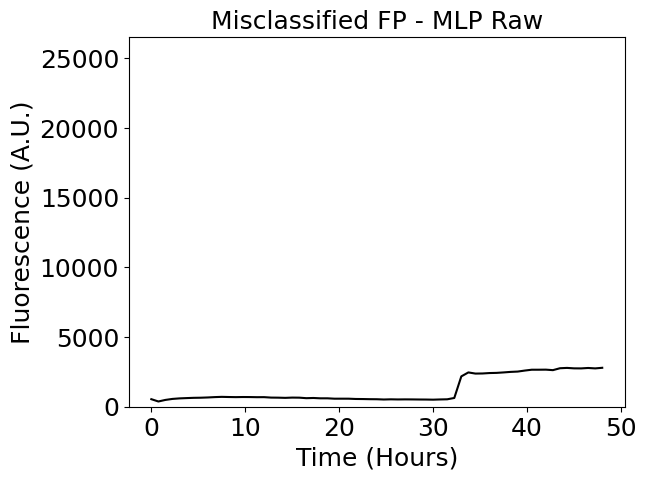

-------- Positive Characteristics for Reference --------
Time To Threshold:
	Min: 4.5, Average: 24.137729083665338, Max: 48.0
RAF:
	Min: 0.020833333, Average: 0.04897407959362549, Max: 0.222222222
MPR:
	Min: 1.241918665, Average: 11.794695727689245, Max: 54.12040816
MS:
	Min: 61.5, Average: 941.0824203187251, Max: 5967.75
26/26 [==============================] - 0s 680us/step


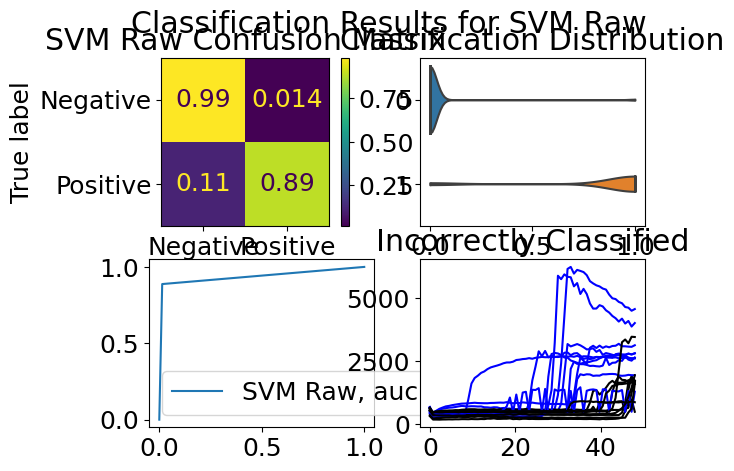

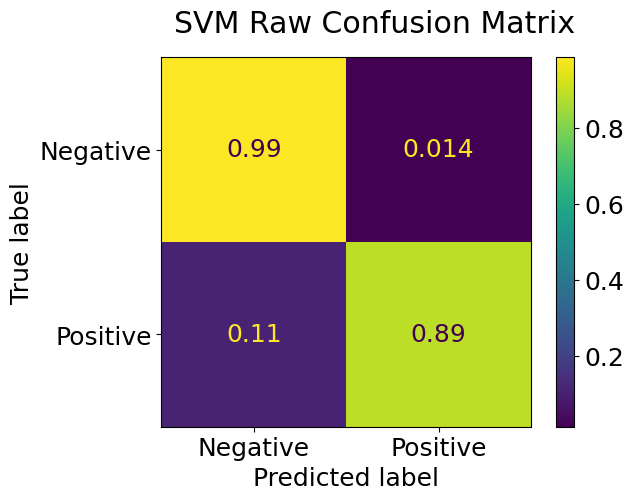

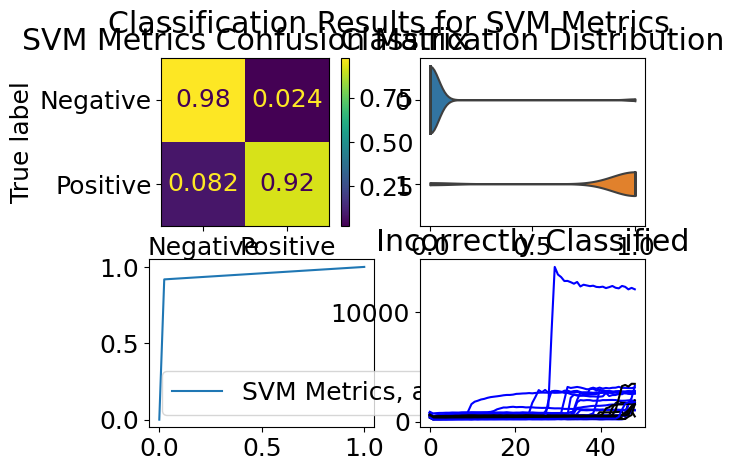

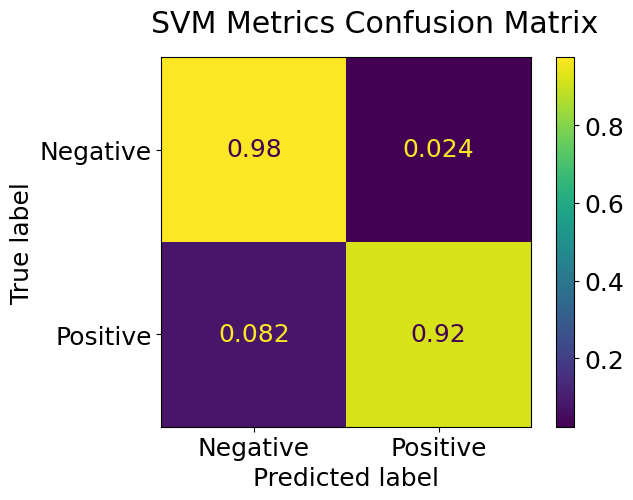

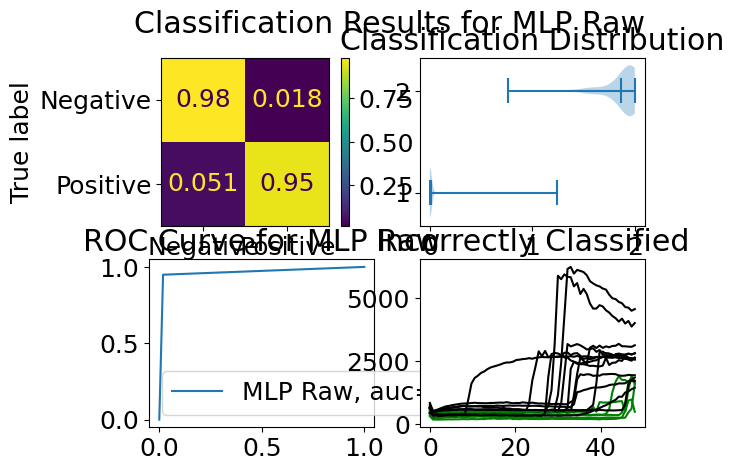

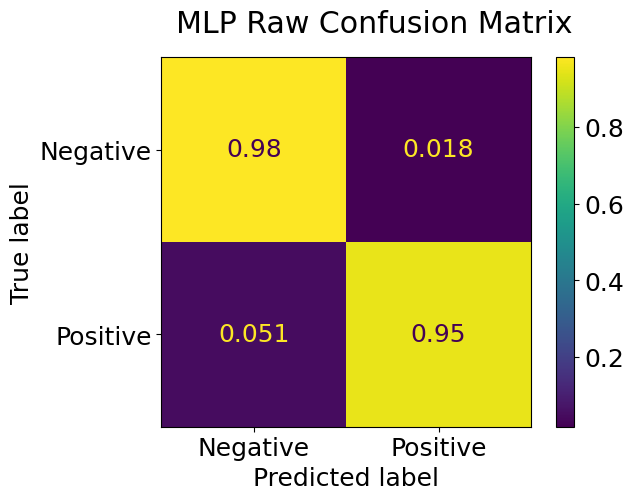

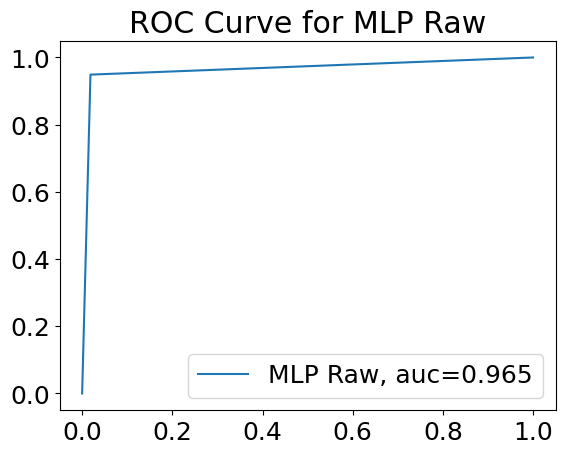

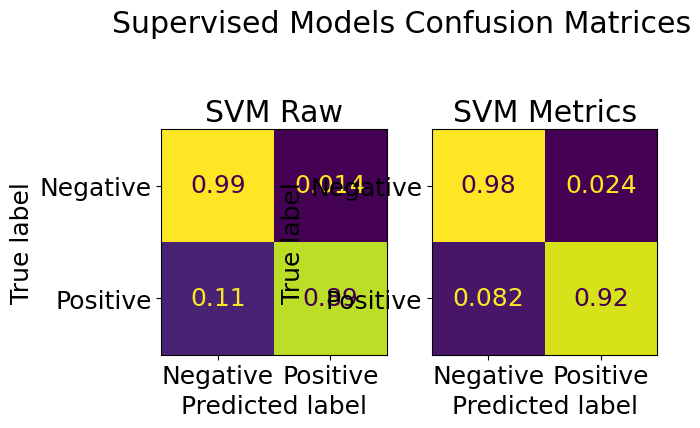

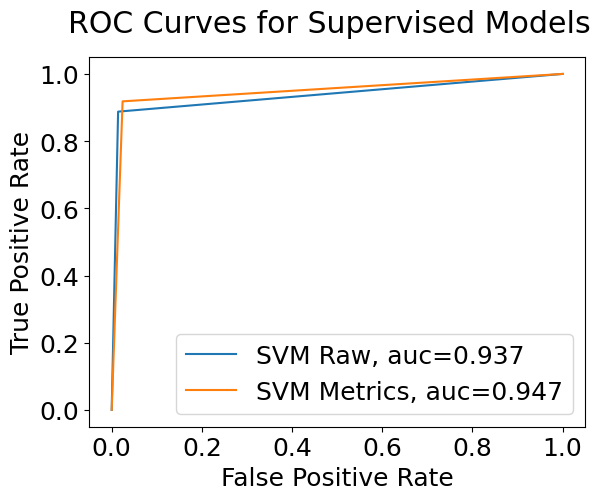

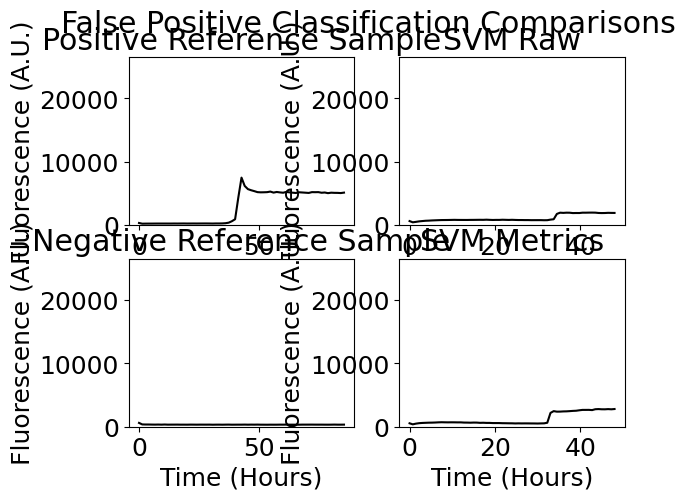

In [ ]:
### Get Supervised Scores and Plots
ml_quic.get_model_scores(tags = ['Supervised'])
# ml_quic.evaluate_fp_performance(tags=['Supervised'])
ml_quic.get_model_plots(tags=['Supervised'])